> Librerias Necesarias:

In [ ]:
!pip install nltk
!pip install matplotlib
!pip instal pandas
!pip intall geopandas
!pip install re
!pip install duckdb
!pip install nltk
!pip install collections

---


<br><br>
> 1) Dos ejecutivos de Airbnb están discutiendo respecto a cuáles son las zonas con más 
departamentos en Airbnb. Les ofreces hacer un análisis con buen nivel de detalle 
para enviarles un informe respecto a esto. Ellos dicen que no tienen tiempo de 
leerlo, que solo quieren ver una foto, imagen o tabla que les permita saberlo 
rápidamente. ¿Qué les muestras? (Desarrollar en código)

~~~
Mi codigo: 
~~~

In [138]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import duckdb

##### Cargar el GeoDataFrame y el Dataset de Listenings

In [139]:
data = gpd.read_file('Datasets/neighbourhoods.geojson')
df_listings = pd.read_csv('Datasets/neighbourhoods.csv')

##### Realizar el recuento por vecindario

In [ ]:
count_per_neighbourhood = df_listings['neighbourhood'].value_counts()

##### Agregar el recuento al GeoDataFrame

In [ ]:
data['count'] = data['neighbourhood'].map(count_per_neighbourhood)

#### Plotear:

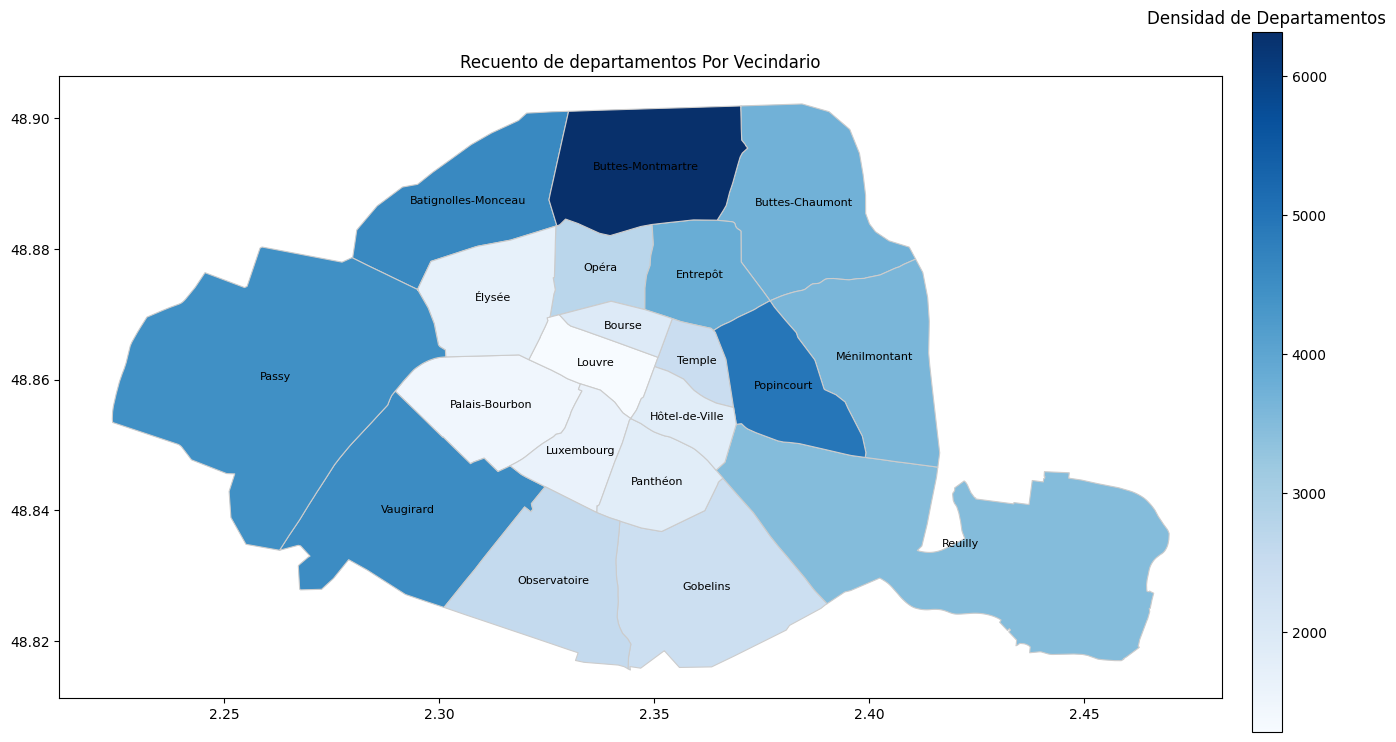

In [143]:
fig, ax = plt.subplots(figsize=(15, 10))

##### Visualizar el GeoDataFrame con colores proporcionales al recuento
data.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)


plt.title('Recuento de departamentos Por Vecindario')

# Agrego la leyenda manualmente
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=data['count'].min(), vmax=data['count'].max()))
sm.set_array([])
fig.colorbar(sm, cax=cax)
cax.set_title('Densidad de Departamentos')

##### Agrego el nombre del vecindario a cada área
for idx, row in data.iterrows():
    label = row['neighbourhood']
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, label, ha='center', va='center', fontsize=8)
plt.show()


<br><br>
<hr>

> 2) En otras ciudades del mundo, la gente está usando cada vez menos la aplicación. Al 
equipo ejecutivo en París le preocupa esto y quiere saber cómo es la situación en 
esa ciudad. Específicamente, le gustaría ver cómo fueron evolucionando la 
cantidad de reviews escritas a lo largo de los años.

~~~
Mi codigo: 
~~~

##### Leer el archivo CSV

In [6]:

df = pd.read_csv('Datasets/listings_summary.csv')

##### Convertir la columna 'date' en tipo datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])

##### Contar el número de revisiones por fecha

In [ ]:

reviews_count = df['date'].value_counts().sort_index()

##### Calcular un promedio móvil con ventana de 7 días

In [7]:
rolling_avg = reviews_count.rolling(window=7).mean()

##### Plotear:

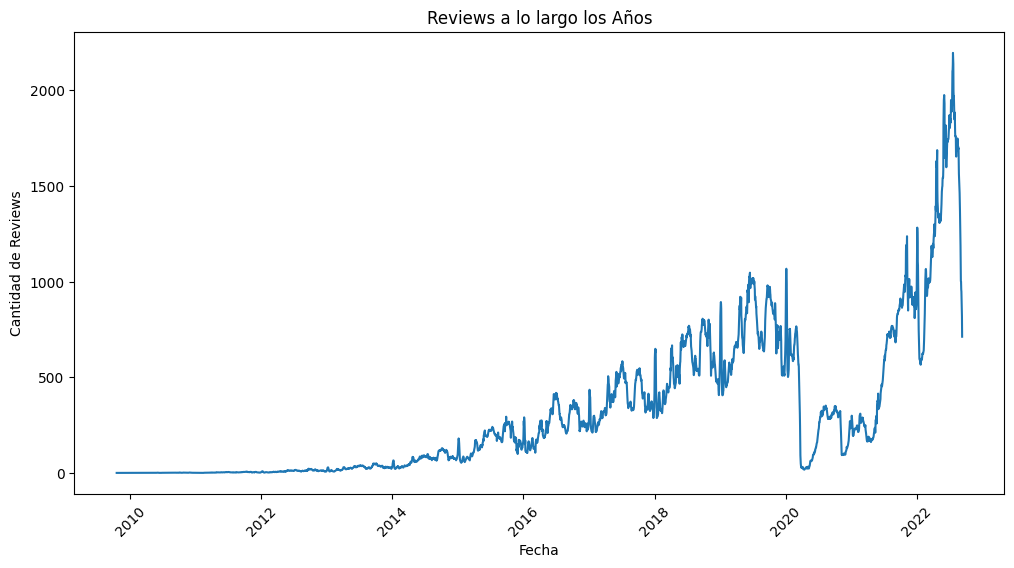

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg.index, rolling_avg.values)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reviews')
plt.title('Reviews a lo largo los Años')
plt.xticks(rotation=45)
plt.show()




#### *Debido a las altas fluctuaciones realice un promedio cada 7 dias, manteniendo la tendencia de la funcion y eliminando el ruido*
<hr>
<br><br>

> 3) El equipo de marketing está trabajando en una campaña global que consiste en
mostrar cuáles son las principales palabras de viajeros asociadas a las principales
ciudades del mundo. Les gustaría saber cuáles son las principales palabras que
dicen de París (realiza la representación que prefieras para responder esta
pregunta)
~~~
Mi codigo: 
~~~

In [9]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/mkm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mkm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Leer el archivo CSV

In [ ]:
df = pd.read_csv('Datasets/reviews.csv')

##### Eliminar filas con valores faltantes en la columna 'comments'

In [2]:
df = df.dropna(subset=['comments'])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

##### Filtrar las reseñas de París

In [ ]:
paris_reviews = df[df['comments'].str.contains('Paris', case=False)]

##### Obtener todas las palabras de las reseñas de París

In [12]:
all_words = ' '.join(paris_reviews['comments']).lower()

##### Tokenizar las palabras

In [ ]:
tokens = word_tokenize(all_words)


##### Eliminar las palabras de parada (stop words)

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

##### Contar la frecuencia de las palabras

In [13]:
word_counts = Counter(filtered_tokens)

##### Obtener las 10 principales palabras más frecuentes

In [ ]:
top_words = word_counts.most_common(30)

##### Obtener las palabras y sus frecuencias

In [ ]:
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]


##### Plotear:

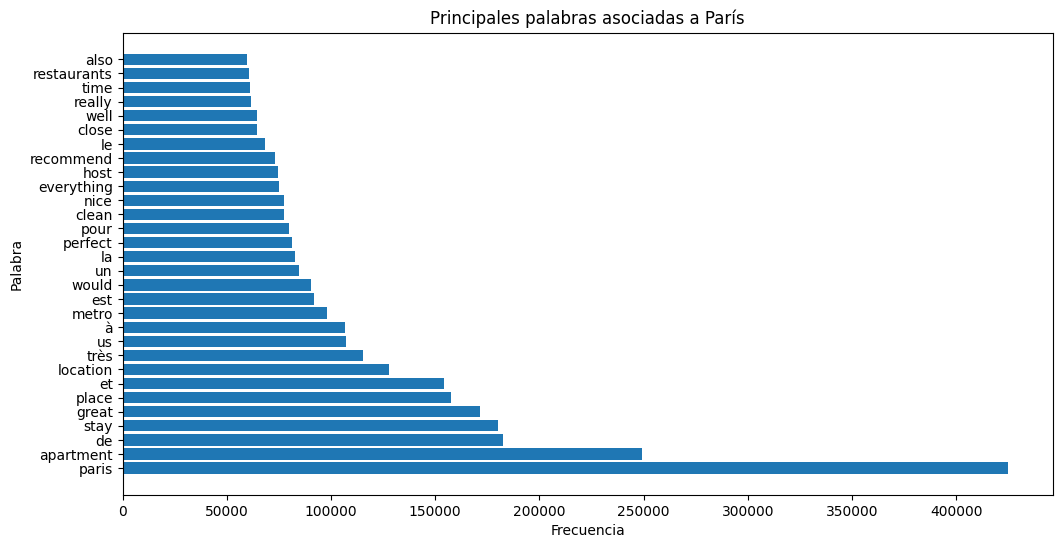

In [18]:
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Principales palabras asociadas a París')
plt.show()


<hr>
<br><br>

> 4) La inflación está haciendo estragos en Europa y al equipo ejecutivo le interesa saber
cuál es la concepción de esto entre los propietarios de alojamientos. En otras
palabras, les interesa saber si ya están teniendo en cuenta el aumento de precios a
futuro en sus departamentos y existe una tendencia alcista en los precios que
publican en Airbnb, o si no le están dando mayor importancia y los precios se ven
bastante estáticos a futuro. La pregunta que escuchaste a un ejecutivo decir es:
**`"¿Los inquilinos están planificando aumentar los precios?".`** (Siéntete libre de
responderla de la forma que quieras, a partir de correr algún análisis estadístico,
representación gráfica, etc. Para esta pregunta, puedes consultar el dataset
“calendar.csv” que incluye, para cada propiedad, el precio definido día a día para el
próximo año).
~~~
Mi codigo: 
~~~

##### Cargar el archivo "calendar.csv" en un DataFrame

In [ ]:
df = pd.read_csv('Datasets/calendar.csv')

##### Convertir la columna de precios a valores numéricos eliminando el símbolo de dólar y las comas

In [ ]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

##### Convertir la columna de fecha a formato de fecha

In [18]:
df['date'] = pd.to_datetime(df['date'])

##### Agregar una columna para el mes

In [146]:
df['month'] = df['date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

##### Calcular el precio promedio por mes y alojamiento

In [19]:
precio_promedio_por_mes = df.groupby(['listing_id', 'month'])['price'].mean().reset_index()

##### Calcular la diferencia de precios entre meses consecutivos para cada alojamiento

In [ ]:
precio_promedio_por_mes['precio_dif'] = precio_promedio_por_mes.groupby('listing_id')['price'].diff()

##### Calcular el porcentaje de cambio de precios respecto al mes anterior

In [ ]:
precio_promedio_por_mes['porcentaje_cambio'] = (precio_promedio_por_mes['precio_dif'] / precio_promedio_por_mes['price'].shift()) * 100

##### Calcular el promedio de porcentaje de cambio de precios por mes

In [20]:
promedio_porcentaje_cambio = precio_promedio_por_mes.groupby('month')['porcentaje_cambio'].mean()

Plotear:

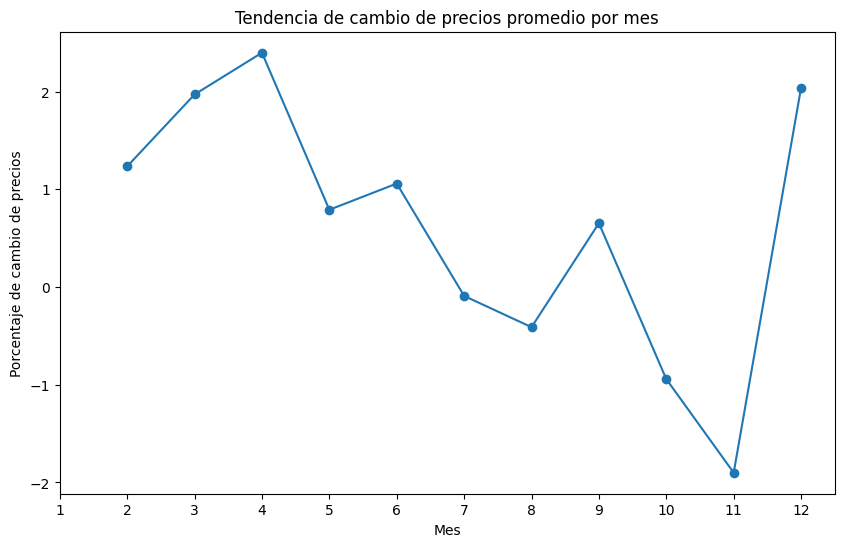

In [21]:
plt.figure(figsize=(10, 6))
promedio_porcentaje_cambio.plot(kind='line', marker='o')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de cambio de precios')
plt.title('Tendencia de cambio de precios promedio por mes')
plt.xticks(range(1, 13))
plt.show()

#### *Se puede inferir que los inquilinos estan subiendo,en gran medida por la inflacion, los precios de renta de sus propiedades.*
<hr>
<br><br>

> 5) En promedio, ¿cuál es el precio que paga una persona que se queda en un Airbnb?
~~~
Mi codigo: 
~~~

##### Calcular el precio promedio:

In [24]:

precio_promedio = df['price'].mean()

print("El precio promedio que paga una persona en un Airbnb es:", round(precio_promedio,2),'€')


El precio promedio que paga una persona en un Airbnb es: 171.7 €


### El precio promedio que paga una persona en un Airbnb es: 171.7 $
<hr>
<br><br>

> 6) El equipo de Marketing quiere hacerles un regalo a los mejores 10 anfitriónes de
Airbnb en París. Te pide una lista de quienes son para hacerlo. ¿A quiénes elegirías
para darle este regalo? ¿Por qué?
~~~
Mi codigo: 
~~~

##### Cargar los archivos listenings.csv y reviews.csv

In [28]:
df_listenings = pd.read_csv("Datasets/listings.csv")
df_reviews = pd.read_csv("Datasets/reviews.csv")

##### Filtrar las columnas relevantes del archivo listenings.csv


In [ ]:
df_filtered_listenings = df_listenings[['id', 'host_name']]

##### Filtrar las columnas relevantes del archivo reviews.csv

In [29]:
df_filtered_reviews = df_reviews[['listing_id', 'comments']]

Muchas palabras las tome de esta paina web: [link_Here](https://takelessons.com/blog/beautiful-french-words-z04) para formar el Array.

In [62]:
words_key=["serviable", "propre", "agréable", "parfaitement conforme aux photos", "exceptionnelle",
"chaleureuse", "super sympa", "super séjour", "très bon séjour", "accueillis agréablement",
"Très bon accueil et disponibilité", "A conseiller","tres", "accueillant", "et", "arrangeant", "delightful",
"cozy", "comfortably", "modern", "spacious", "beautiful",
"responsive", "excellent", "experience", "friendly", "helpful",
"gem", "extremely", "convenient", "loved", "excellent",
"wonderful", "stylish", "super", "cool", "chic",
"great", "amazing", "perfect", "clean", "quiet",
"recommend", "homely", "fantastic", "lovely", "beautifully",
"appointed", "ultra", "comfortable", "perfectly", "located",
"highly", "definitely", "well", "equipped", "bright",
"quiet", "spacious", "immediately", "kindly", "very",
"friendly", "super", "sympathique", "unique", "exceptionnel",
"agréable", "calme", "bien", "aménagé", "sécurisé",
"parfait", "grand", "situé", "chaleureux", "propre",
"cocon", "idéal", "ultra", "pratique", "sereine",
"réactive", "intuitive", "séduisant", "émouvante", "incroyable",
"magique", "adore", "adoré", "superbe", "apprécié",
"génial", "impressionnée", "merveilleux", "splendide", "charmant",
"généreux", "formidable", "belle", "chouette", "sûr",
"confort", "facilité", "expérience", "détendre", "charmante",
"conseil", "précieux", "commerçant", "saint", "confortable",
"tranquille", "douce", "recommandation", "contact", "gentillesse",
"attention", "hospitalité", "sens", "propreté", "harmonie",
"super", "emplacement", "confortable", "atypique", "artistique",
"original", "pratique", "originalité", "tranquille", "artistique",
"coup", "lumineux", "artistique", "étendu", "spécial",
"accueil", "clarté", "agréable", "propre", "plaisant",
"bien", "tenu", "appareil", "confortable", "terrasse",
"courte", "cuisine", "fraiche", "simple", "lumière",
"charme", "étonnant", "sympathique", "séjour", "comme",
"maison", "très", "tranquille", "très", "chouette",
"charmante", "plutôt", "spacieux", "parfaitement", "propre",
"douillet", "sympathique", "calme", "lumineux", "accueillant",
"plaisant", "sobre", "pratique", "calme", "spacieux",
"emplacement", "confortable", "spacieux", "recommande", "agréable",
"tranquille", "propre", "emplacement", "calme", "excellent"
]

##### Función para limpiar y contar las reviews positivas

In [63]:
def count_positive_reviews(comment):
    if isinstance(comment, str):
        comment_lower = comment.lower()
        comment_clean = re.sub(r"[^\w\s]", "", comment_lower)  # Eliminar caracteres especiales
        count = sum(comment_clean.count(word) for word in words_key)
        return count
    else:
        return 0

##### Agregar columna con la cantidad de reviews positivas al archivo reviews.csv


In [ ]:
df_filtered_reviews['positive_reviews_count'] = df_filtered_reviews['comments'].apply(count_positive_reviews)
df_filtered_reviews

##### Agrupar por ID del anuncio y sumar la cantidad de reviews positivas

In [64]:
df_positive_reviews = df_filtered_reviews.groupby('listing_id')['positive_reviews_count'].sum().reset_index()

/tmp/ipykernel_3684/2599990534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_reviews['positive_reviews_count'] = df_filtered_reviews['comments'].apply(count_positive_reviews)


##### Combinar la información de listenings.csv y reviews.csv


In [ ]:
df_combined = pd.merge(df_listenings, df_positive_reviews, how='left', left_on='id', right_on='listing_id')

##### Obtener el nombre del host, el ID del host y la cantidad de reviews positivas


In [ ]:
df_result = df_combined[['host_name', 'id', 'positive_reviews_count']]

##### Ordenar en orden descendente según la cantidad de reviews positivas

In [ ]:
df_result = df_result.sort_values('positive_reviews_count', ascending=False)

##### Seleccionar los primeros 10 anfitriones


In [ ]:
top_10_hosts = df_result.head(10)

##### Mostrar el resultado final

In [75]:
top_10_hosts[['host_name', 'id', 'positive_reviews_count']].reset_index(drop=True)

,host_name,id,positive_reviews_count
0,Lionel,26244787,16177.0
1,Alexandra,17222007,9083.0
2,Roxane,46255907,8928.0
3,Maguy,846954,7625.0
4,Hôtel Eugène En Ville,22666855,7283.0
5,Axel,2488829,6713.0
6,HappyCulture,32798718,6393.0
7,Mike,1249964,6167.0
8,The People Paris Bercy,40194697,5865.0
9,Marc,2412144,5687.0


Cuantifique la cantidad de palabras relacionadas a buenas experiencias en las reviews de los departamentos.Cuan mayor sea la cantidad de palabras clave, mejor la posicion del anfitrion.
<hr>
<br><br>

> 7) Por último: Crear una query SQL que devuelva: el precio promedio del mes de enero
de 2023 de cada una de las propiedades ranqueadas por los 3 usuarios que más
reviews escribieron. Esta query también debe incluir el porcentaje de que tan
disponible está este departamento durante ese mes. También se debe incluir el
nombre del dueño de la propiedad (Debe ser una sola query. Deben ordenarse los
resultados por “listing_id” en orden ascendente. Para este requerimiento, utilizar la
librería "duckdb" de Python, que permite correr queries en SQL contra Dataframes
de Pandas. Nota: las queries están en el dialecto del sistema SQLite)
~~~
Mi codigo: 
~~~

##### Establecer conexión con una base de datos temporal

In [ ]:
con = duckdb.connect(':memory:')

listings_df = pd.read_csv('Datasets/listings.csv')
reviews_df = pd.read_csv('Datasets/reviews.csv')
calendar_df = pd.read_csv('Datasets/calendar.csv')

##### Convertir la columna "price" en el DataFrame "calendar_df" a tipo numérico

In [ ]:
calendar_df['price'] = calendar_df['price'].str.replace('[^\d.]', '', regex=True).astype(float)

##### Crear tablas temporales en la base de datos utilizando los DataFrames

In [144]:
con.register('listings', listings_df)
con.register('reviews', reviews_df)
con.register('calendar', calendar_df)

KeyboardInterrupt: 

##### Ejecutar la consulta SQL

In [136]:
query = '''
SELECT l.id, l.host_name, AVG(c.price) AS avg_price
FROM listings AS l
JOIN (
    SELECT listing_id, price
    FROM calendar
    WHERE date >= '2023-01-01' AND date < '2023-02-01'
) AS c ON l.id = c.listing_id
JOIN (
    SELECT reviewer_id
    FROM reviews
    GROUP BY reviewer_id
    ORDER BY COUNT(*) DESC
    LIMIT 3
) AS r ON l.host_id = r.reviewer_id
GROUP BY l.id, l.host_name
ORDER BY l.id ASC
'''
result = con.execute(query).fetchall()

Empty DataFrame
Columns: [listing_id, host_name, average_price]
Index: []


##### Crear un DataFrame a partir del resultado de la consulta


In [ ]:
result_df = pd.DataFrame(result, columns=['listing_id', 'host_name', 'average_price'])

##### Imprimir el resultado

In [ ]:
print(result_df)

No he podido, solucionar la problematica. Necesito mas tiempo, Muchas gracias.